In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="white")

In [15]:
id = 16
hmap_labels = ["None", "myelinmap", "thickness", "synapticden", "ndi", "odi", "SAaxis", "genePC1", "genel4PC1", "megtimescale", "eiratio3.2"]
hmap_labels_plotting = ["Homogeneous", "T1w/T2w", "cortical thickness", "synaptic density", "NDI", "ODI", "SA  Axis", "PC1 gene", "PC1 gene (L4)", "MEG timescale", "E:I ratio"]
version_labels = ["EdgeFC & FCD", "EdgeFC & NodeFC & FCD"]
metrics = ["edge_fc", "node_fc", "fcd"]

if len(hmap_labels) > 1 and len(version_labels) != 2:
    raise ValueError("Only two version label allowed for multiple hmap labels")

## Compare results

In [16]:
edge_fc, node_fc, fcd = [], [], []
for hmap_label in hmap_labels:
    for i in range(len(version_labels)):
        if i < 1:
            file = f"{PROJ_DIR}/results/model_rs/crossval/id-{id}/{hmap_label}_results.hdf5"
        else:
            file = f"{PROJ_DIR}/results/model_rs/crossval/id-{id}/{hmap_label}_results_{i}.hdf5"

        with h5py.File(file, 'r') as f:
            edge_fc.append(np.array(f['edge_fc_test'][:]).flatten())
            node_fc.append(np.array(f['node_fc_test'][:]).flatten())
            fcd.append(1 - np.array(f['fcd_test'][:]).flatten())

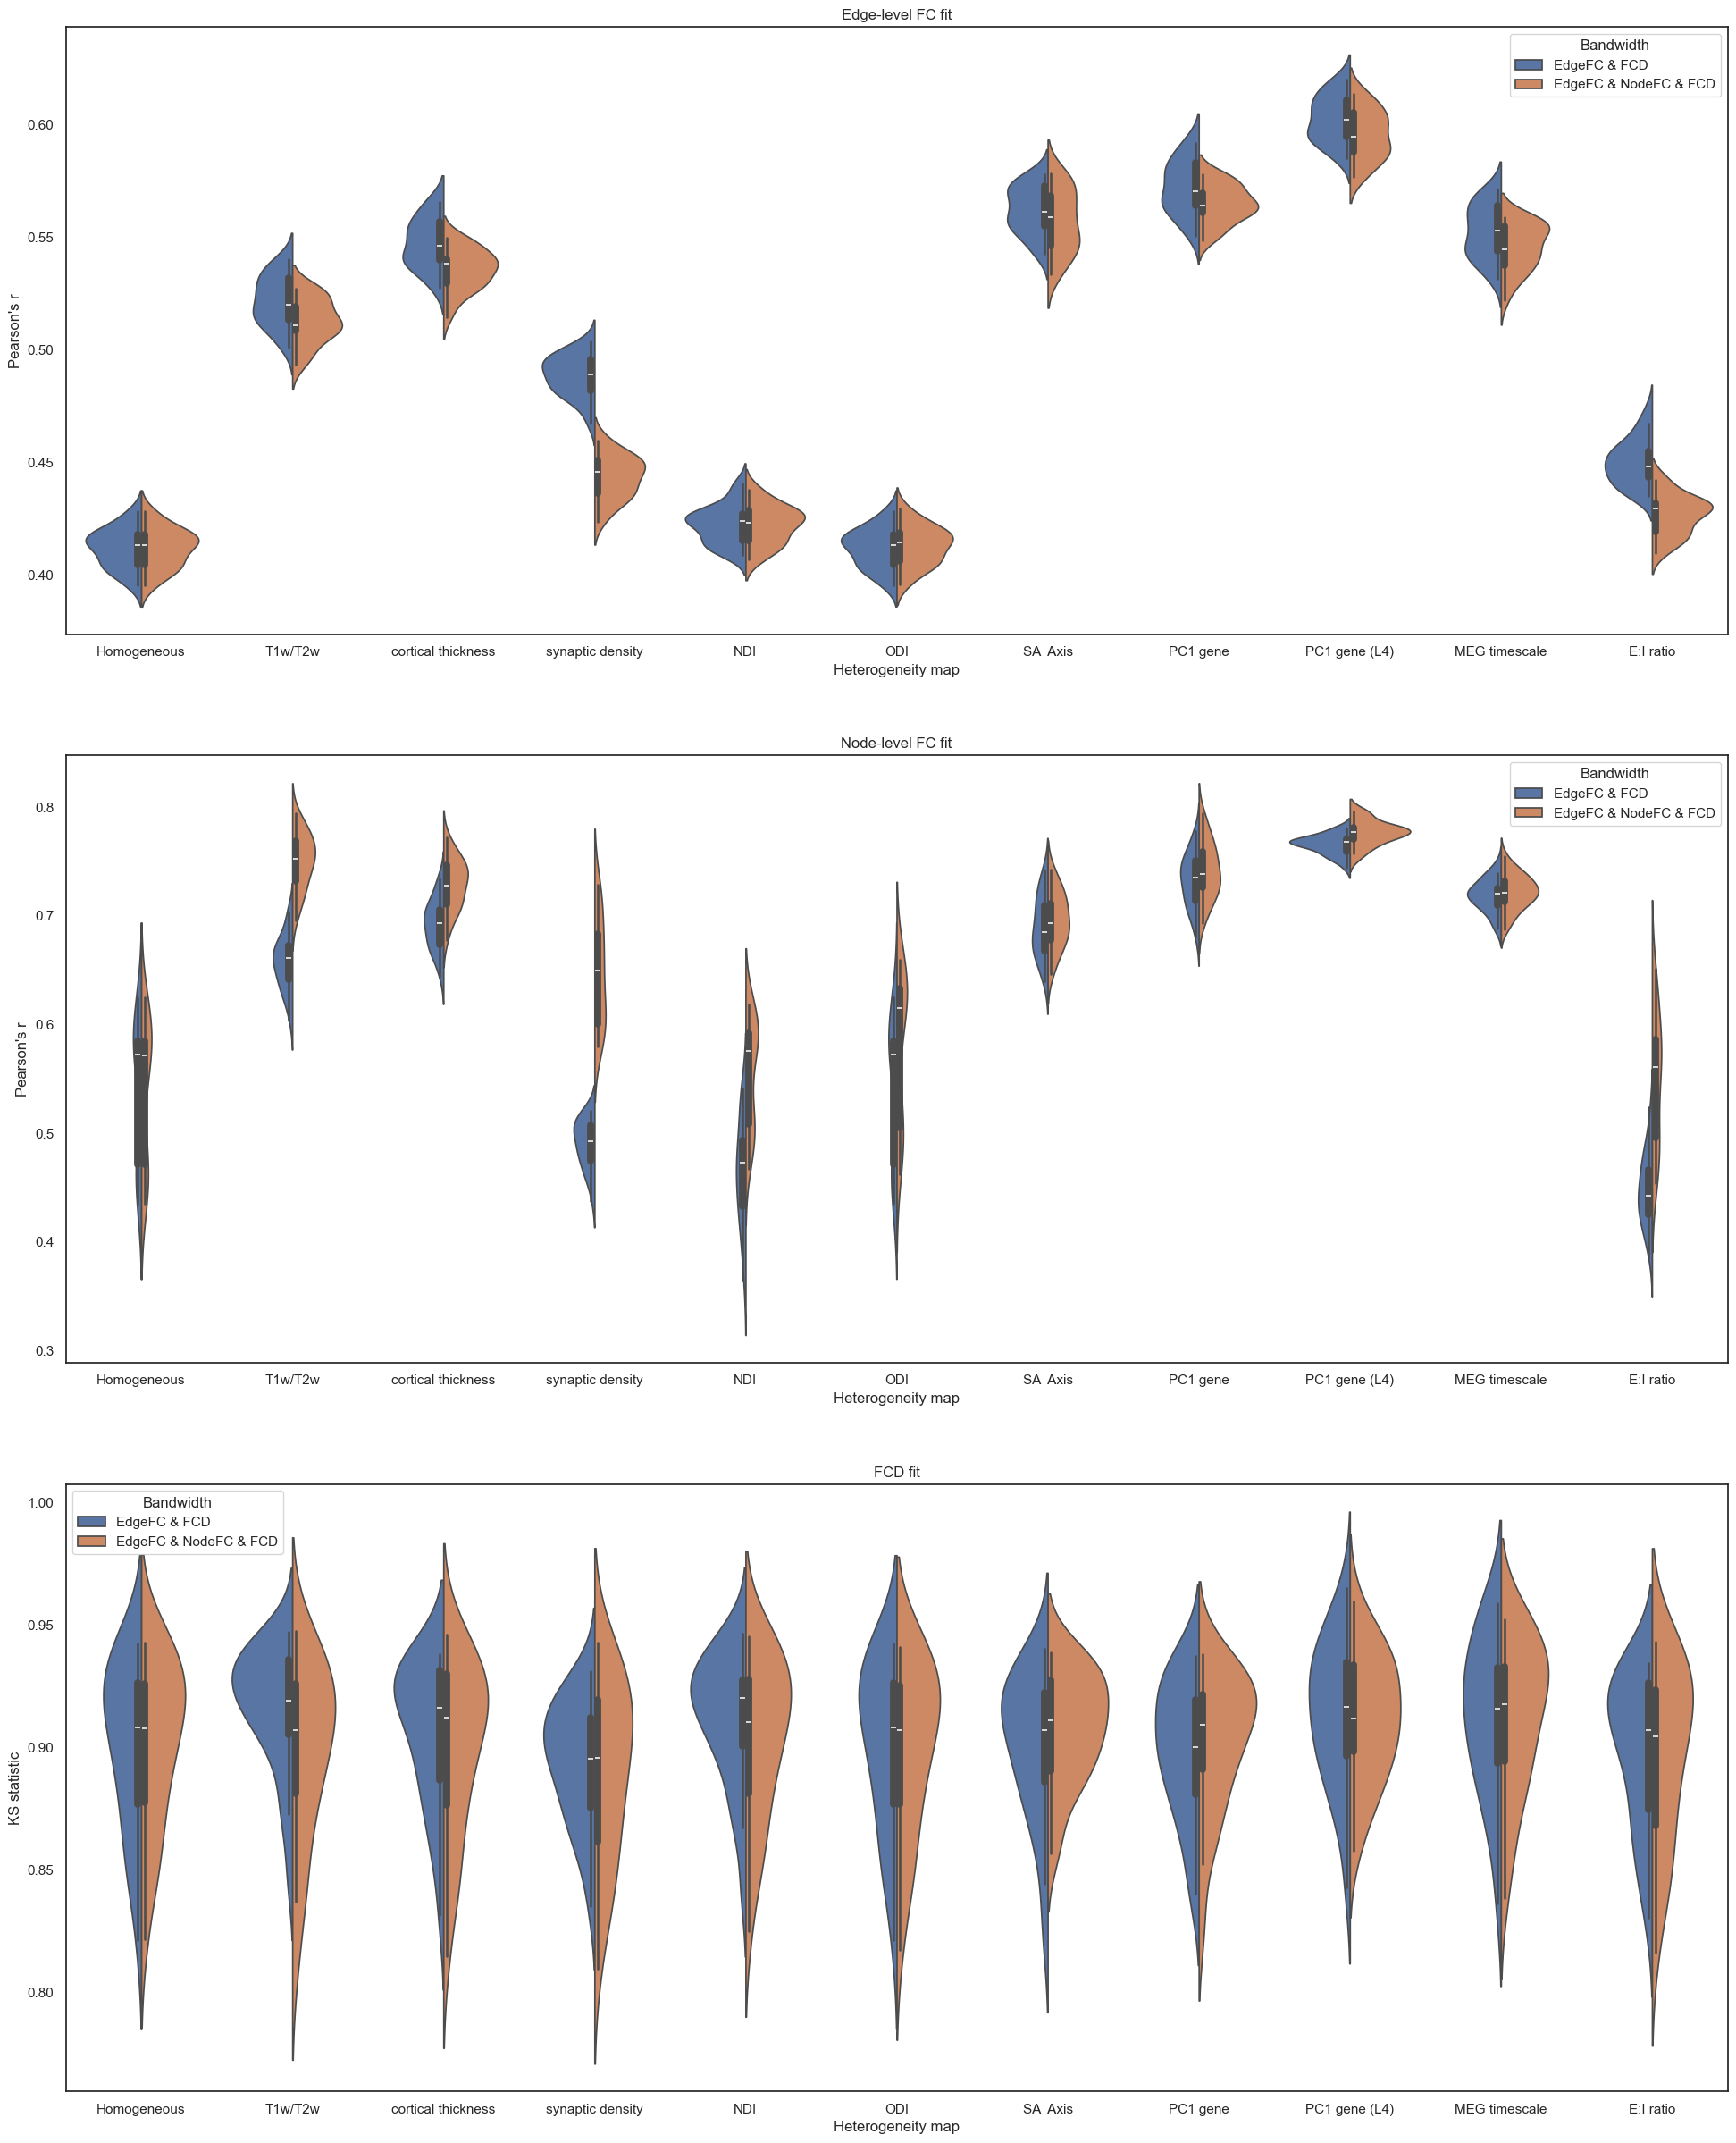

In [23]:
if len(metrics) == 1:
    fig = plt.figure(figsize=(8, 30))
    axs = [plt.gca()]
else:
    fig, axs = plt.subplots(len(metrics), 1, figsize=(len(metrics)*8, 30))
    axs = axs.flatten()

data_plotting = {"edge_fc": edge_fc, "node_fc": node_fc, "fcd": fcd}
metrics_plotting = {"edge_fc": "Edge-level FC fit", "node_fc": "Node-level FC fit", "fcd": "FCD fit"}
ylabels_plotting = {"edge_fc": "Pearson's r", "node_fc": "Pearson's r", "fcd": "KS statistic"}

for i, metric in enumerate(metrics):
    if len(hmap_labels) > 1:
        df = pd.DataFrame(
            np.array(data_plotting[metric]).T,
            columns = pd.MultiIndex.from_product([hmap_labels, version_labels], names=["hmap", "Bandwidth"])
        ).melt(value_name="metric")

        sns.violinplot(data=df, ax=axs[i], x="hmap", y="metric", hue="Bandwidth", split=True)
        axs[i].set_xticks(ticks=range(len(hmap_labels)))
        axs[i].set_xticklabels(labels=hmap_labels_plotting)
        axs[i].set_xlabel("Heterogeneity map")
    else:
        sns.violinplot(data=data_plotting[metric], ax=axs[i])
        axs[i].set_xticks(ticks=range(len(version_labels)))
        axs[i].set_xticklabels(labels=version_labels)
        axs[i].set_xlabel("Version")

    axs[i].set_title(metrics_plotting[metric])
    axs[i].set_ylabel(ylabels_plotting[metric])